In [12]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

Populating the interactive namespace from numpy and matplotlib


In [4]:
boston = load_boston()

In [5]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression() 
lr.fit(boston.data[:, 5].reshape(-1, 1), boston.target) # датасет, правильные ответы 
grid = np.linspace(boston.data[:, 5].min(), boston.data[:, 5].max(), 100) # равномерная сетка из 100 точек 
best_line = lr.predict(grid.reshape(-1, 1)) # предсказание в точках этой сетки

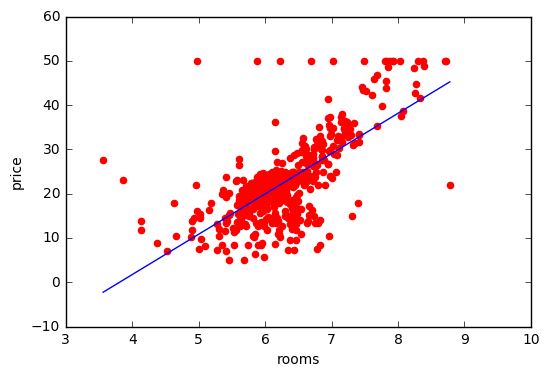

In [10]:
plt.scatter(boston.data[:, 5], boston.target, color = 'r')
plt.plot(grid, best_line)
plt.xlabel('rooms')
plt.ylabel('price')

In [13]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = lr.predict(boston.data[:, 5].reshape(-1, 1))
MSE = mean_squared_error(boston.target, y_pred)
print("MSE =", MSE)

MSE = 43.6005517712


In [16]:
from sklearn.metrics import r2_score

In [17]:
r2 = r2_score(boston.target, y_pred)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(boston.data)
X = scaler.transform(boston.data)

In [22]:
print("new mean =", np.mean(X, axis=0))
print("new std =", np.std(X, axis=0))

new mean = [  6.34099712e-17  -6.34319123e-16  -2.68291099e-15   4.70199198e-16
   2.49032240e-15  -1.14523016e-14  -1.40785495e-15   9.21090169e-16
   5.44140929e-16  -8.86861950e-16  -9.20563581e-15   8.16310129e-15
  -3.37016317e-16]
new std = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [23]:
y = boston.target
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

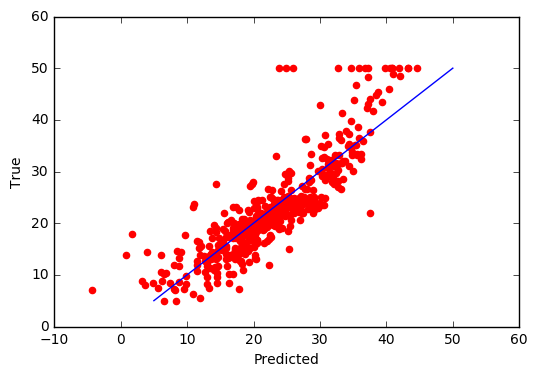

In [24]:
y_pred = lr.predict(X)
plt.scatter(y_pred, y, color='r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]]) #строим прямую по 2м точкам

In [25]:
# смотрим на признаки: чем признак больше по модулю, тем более он нам важен /для определения цены/.
# отрицательные значения уменьшают цену, положительные увеличивают
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [26]:
from sklearn.cross_validation import KFold

In [28]:
kf = KFold(X.shape[0], n_folds=5)
y_pred = np.zeros(y.shape)
for train, test in kf:
    lr.fit(X[train], y[train])
    y_pred[test] = lr.predict(X[test])

In [29]:
#print()